In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow.keras as keras
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [3]:
def grab_image(img_path):
    img = image.load_img(img_path, color_mode="grayscale", target_size=(208, 176))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [4]:
img = grab_image('/content/drive/MyDrive/AlzheimersDataset/Positive/pos(1).jpg')
img2 = grab_image('/content/drive/MyDrive/AlzheimersDataset/Negative/neg(1).jpg')

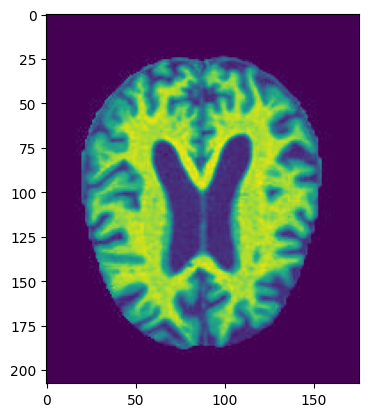

In [5]:
plt.imshow(image.array_to_img(img[0,:,:,:]))
plt.show()

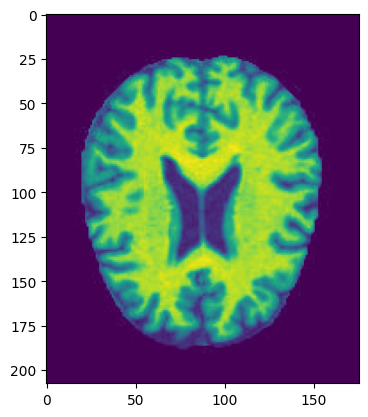

In [6]:
plt.imshow(image.array_to_img(img2[0,:,:,:]))
plt.show()

In [7]:
positive_images = np.concatenate( [grab_image('/content/drive/MyDrive/AlzheimersDataset/Positive/pos(%d).jpg'%(i)) for i in range(1, 3201)])

In [14]:
2+2

4

In [15]:
negative_images = np.concatenate( [grab_image('/content/drive/MyDrive/AlzheimersDataset/Negative/neg(%d).jpg'%(i)) for i in range(1, 3201)])

In [16]:
negative_labels = np.zeros(3200, dtype=int)
positive_labels = np.ones(3200, dtype=int)

In [17]:
X = np.concatenate([negative_images, positive_images])
Y = np.concatenate([negative_labels, positive_labels])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
batch_size = 32
epochs = 10
history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split = 0.2,
                    shuffle=True)

Epoch 1/10
128/128 [==============================] - 15s 27ms/step - loss: 0.6364 - accuracy: 0.6465 - val_loss: 0.5664 - val_accuracy: 0.7168
Epoch 2/10
128/128 [==============================] - 3s 24ms/step - loss: 0.4974 - accuracy: 0.7605 - val_loss: 0.4693 - val_accuracy: 0.7578
Epoch 3/10
128/128 [==============================] - 3s 25ms/step - loss: 0.3472 - accuracy: 0.8477 - val_loss: 0.3343 - val_accuracy: 0.8389
Epoch 4/10
128/128 [==============================] - 3s 26ms/step - loss: 0.2017 - accuracy: 0.9185 - val_loss: 0.3350 - val_accuracy: 0.8662
Epoch 5/10
128/128 [==============================] - 3s 24ms/step - loss: 0.1033 - accuracy: 0.9631 - val_loss: 0.2545 - val_accuracy: 0.8945
Epoch 6/10
128/128 [==============================] - 3s 24ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.2106 - val_accuracy: 0.9336
Epoch 7/10
128/128 [==============================] - 3s 23ms/step - loss: 0.0163 - accuracy: 0.9958 - val_loss: 0.2780 - val_accuracy: 0.927

In [22]:
prediction = model.evaluate(X_test)

40/40 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


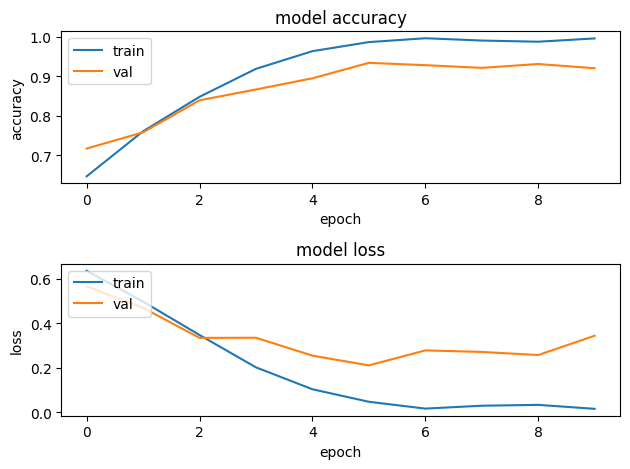

In [28]:
plt.figure(1)

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
kfold = KFold(n_splits=5, shuffle=True)

In [30]:
acc_per_fold = []
loss_per_fold = []
Y_preds = []
Y_actuals = []

In [31]:
fold_no = 1
num_classes = 2

for train, test in kfold.split(X,Y):

    model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation='relu'),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(num_classes)
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate = 0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    # Fit data to model
    history = model.fit(X[train], Y[train],
                        batch_size=32,
                        epochs=10,
                        verbose=1)
    # Generate generalization metrics
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    for x in Y[test]:
        Y_actuals = np.append(Y_actuals, x)
    for z in model.predict(X[test]):
        Y_preds = np.append(Y_preds, np.argmax(z))
    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
160/160 [==============================] - 5s 21ms/step - loss: 0.6056 - accuracy: 0.6730
Epoch 2/10
160/160 [==============================] - 3s 22ms/step - loss: 0.4200 - accuracy: 0.7977
Epoch 3/10
160/160 [==============================] - 3s 21ms/step - loss: 0.2112 - accuracy: 0.9137
Epoch 4/10
160/160 [==============================] - 3s 21ms/step - loss: 0.0943 - accuracy: 0.9645
Epoch 5/10
160/160 [==============================] - 3s 21ms/step - loss: 0.0264 - accuracy: 0.9924
Epoch 6/10
160/160 [==============================] - 3s 21ms/step - loss: 0.0285 - accuracy: 0.9900
Epoch 7/10
160/160 [==============================] - 3s 22ms/step - loss: 0.0184 - accuracy: 0.9941
Epoch 8/10
160/160 [==============================] - 3s 21ms/step - loss: 0.0252 - accuracy: 0.9912
Epoch 9/10
160/160 [==============================] - 3s 21ms/step - loss: 0.0076 - accuracy: 0

In [32]:
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, 5):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.05803487449884415 - Accuracy: 98.4375%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.05520056560635567 - Accuracy: 98.046875%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.11393562704324722 - Accuracy: 95.93750238418579%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.1372324377298355 - Accuracy: 96.64062261581421%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.09748620539903641 - Accuracy: 98.20312261581421%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.45312452316284 (+- 0.9840022016973297)
> Loss: 0.09237794205546379
-----------------------------------------

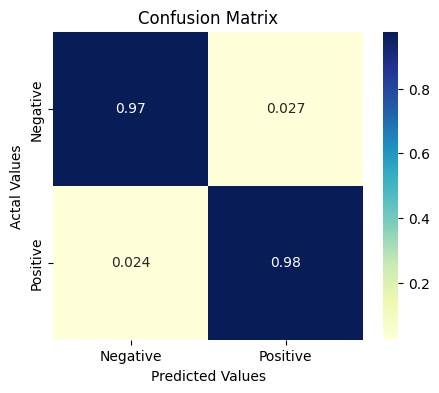

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm = confusion_matrix(Y_actuals, Y_preds, normalize = "true")
cm_df = pd.DataFrame(cm,
index = ['Negative','Positive'],
columns = ['Negative','Positive'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('myCNN2')

In [34]:
FP = 0.027
FN = 0.024
TP = 0.98
TN = 0.97

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("Recall: ")
print(TPR)

# Specificity or true negative rate
TNR = TN/(TN+FP)
print("Specificity: ")
print(TNR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Presicion: ")
print(TNR)

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)
print("Fall Out: ")
print(FPR)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)

Total = FP+FN+TP+TN

# Overall accuracy
ACC = (TP+TN)/Total
print("Accuracy: ")
print(ACC)

# Random accuracy
R_ACC = ((TN+FP)*(TN+FN)+(FN+TP)*(FP+TP))/(Total*Total)

# Kappa
KAPPA = (ACC-R_ACC)/(1-R_ACC)
print("Kappa: ")
print(KAPPA)

F1 = 2 * (TNR * TPR) / (TNR + TPR)
print("F1:")
print(F1)

Recall: 
0.9760956175298805
Specificity: 
0.9729187562688064
Presicion: 
0.9729187562688064
Fall Out: 
0.02708124373119358
Accuracy: 
0.974512743628186
Kappa: 
0.9490243287186776
F1:
0.9745045977836325
